In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [38]:
data=pd.read_csv('datasets_house-votes-84.csv',na_values=['?'])

In [39]:
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


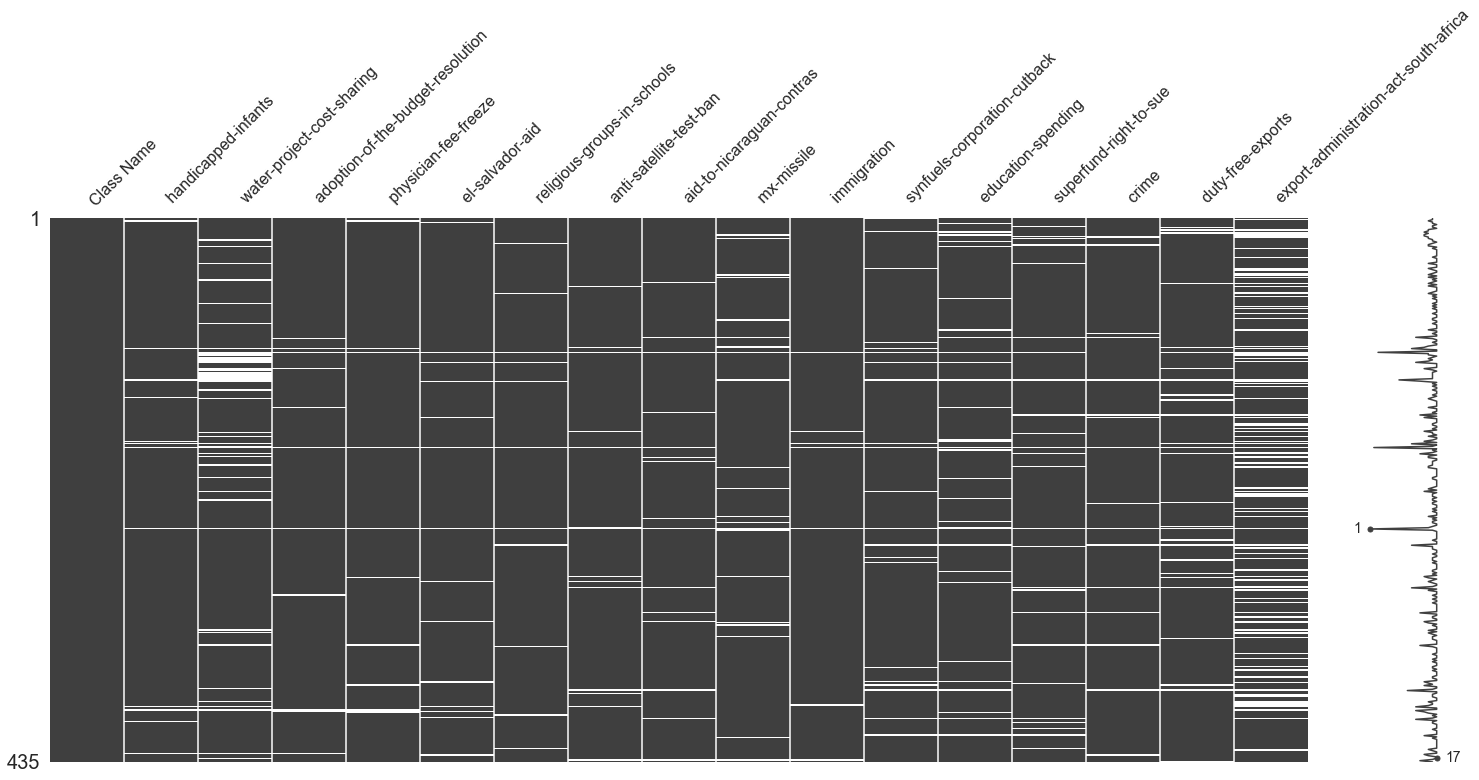

In [40]:
msno.matrix(data)

In [41]:
data['Class Name'].value_counts()

democrat      267
republican    168
Name: Class Name, dtype: int64

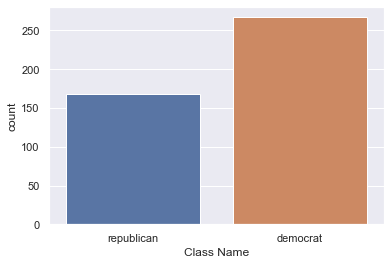

In [42]:
sns.set(style="darkgrid")
sns.countplot(x="Class Name", data=data)

In [43]:
# The label has a imbalanced data which will definately affect the accuracy.

In [23]:
data['Class Name'].mode()[0]

'democrat'

In [31]:
feature=(list(data.columns))

In [32]:
feature.remove('Class Name')

In [44]:
le=LabelEncoder()

In [52]:
for col in feature:
    data[col]=data[col].fillna(data[col].mode()[0])

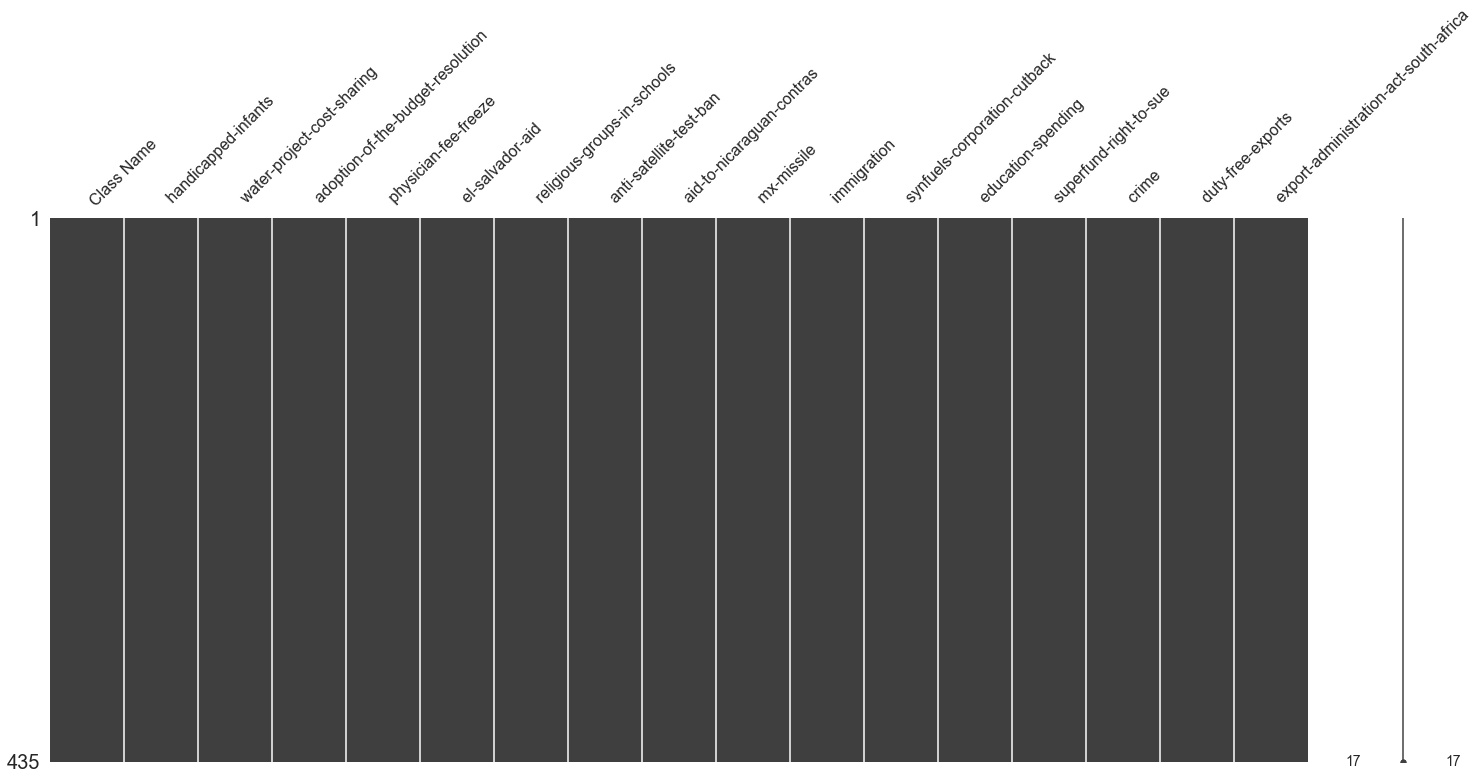

In [53]:
msno.matrix(data)

In [54]:
data['Class Name']=le.fit_transform(data['Class Name'])

In [56]:
for col in feature:
    data[col]=le.fit_transform(data[col])

In [57]:
data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [58]:
y=data['Class Name']
X=data.drop(['Class Name'],axis=1)

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [60]:
X.shape

(435, 16)

In [61]:
X_train.shape

(348, 16)

In [62]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score

In [68]:
model=Sequential()
model.add(Dense(32,input_dim=16, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))

Train on 348 samples, validate on 87 samples
Epoch 1/50
348/348 [==============================] - 2s 4ms/sample - loss: 0.6884 - accuracy: 0.7787 - val_loss: 0.6838 - val_accuracy: 0.7586
Epoch 2/50
348/348 [==============================] - 0s 125us/sample - loss: 0.6787 - accuracy: 0.7414 - val_loss: 0.6691 - val_accuracy: 0.8161
Epoch 3/50
348/348 [==============================] - 0s 121us/sample - loss: 0.6593 - accuracy: 0.8017 - val_loss: 0.6411 - val_accuracy: 0.8391
Epoch 4/50
348/348 [==============================] - 0s 118us/sample - loss: 0.6250 - accuracy: 0.8448 - val_loss: 0.5934 - val_accuracy: 0.8621
Epoch 5/50
348/348 [==============================] - 0s 104us/sample - loss: 0.5619 - accuracy: 0.8822 - val_loss: 0.5238 - val_accuracy: 0.8736
Epoch 6/50
348/348 [==============================] - 0s 118us/sample - loss: 0.4912 - accuracy: 0.8851 - val_loss: 0.4425 - val_accuracy: 0.8851
Epoch 7/50
348/348 [==============================] - 0s 129us/sample - loss: 0.4